### Zadanie1: Oblicz P(B=T, E=T, A=T, J=T, M=F) 

In [7]:
'''
B, E - rodzice
B = T = 0.001
E = T = 0.002
A|B,E = T = 0.95
J|A = T = 0.90
M|A = F = 0.30

'''

P = 0.001*0.002*0.95*0.90*0.30 

print(P)

5.13e-07


### Zadanie2: (oszędność parametrów):

#### Ile potrzeba parametrów aby opisać rozkład łączny 5 zmiennych binarnych?


Potrzebne jest 10 parametrów: 5*2 = 10

#### Ile parametrów ma powyższa sieć?

Sieć z zadania 1 ma 7 parametrów, ale kolejne parametry mogą być opisane przez rodziców(B,E)

### Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i następującej topologii sieci:

Sieć ma 10*2 = 20 parametrów, ale wychodzi ze wszytkie kolejne zmienne są zależne od 1 na górze

### Zadanie4: Wyjaśnij wartość 0.75 w powyższej tabeli (poprzez bezpośrednie wyliczenie i objaśnienie).

5+1=6 large tasty(yes) banana oraz 1+1=2 large tasty(no) banana (+1 przez pseudozliczenia)

suma wszystkich duzych bananow 6+2=8

wychodzi ze large tasty(yes) banana wynosi 6/8=0.75

### Zadanie5: Wygeneruj dane zawierające 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierają losowe liczby całkowite z zakresu <−2,2>. Trzecia kolumna (C) to kombinacja liniowa dwóch pierwszych kolumn C=2A−3B. Zbuduj dwie topologie sieci, tzn. (A−>C,B−>C) oraz (A−>B,B−>C). Oceń która z sieci wydaje sie lepiej odzwierciedlać strukturę danych. Wyjaśnij dlaczego.

In [79]:
import pandas as pd
import random 

#generuje dane

A = [random.randint(-2, 2) for x in range(10000)]
B = [random.randint(-2, 2) for x in range(10000)]
C = [2*a-3*b for a,b in zip(A,B)]

data = {'A': A,
        'B': B,
        'C': C}

df = pd.DataFrame(data)

In [81]:
from pgmpy.models import BayesianNetwork

siec1 = BayesianNetwork([('A', 'C'), ('B', 'C')]) #siec A->C, B->C
siec2 = BayesianNetwork([('A', 'B'), ('B', 'C')]) #siec A->B, B->C

In [82]:
from pgmpy.estimators import BayesianEstimator

siec1.fit(df, estimator=BayesianEstimator, prior_type="BDeu")
siec2.fit(df, estimator=BayesianEstimator, prior_type="BDeu")

In [83]:
# ocena sieci

from pgmpy.estimators import BDeuScore, K2Score, BicScore

bdeu = BDeuScore(df)
k2 = K2Score(df)
bic = BicScore(df)

#im lepszy model tym większa wartosc tych wspolczynnikow
print(bdeu.score(siec1))
print(k2.score(siec1))
print(bic.score(siec1))

-32347.82262623386
-34014.47849220935
-34295.9020376369


In [84]:
#siec2
print(bdeu.score(siec2))
print(k2.score(siec2))
print(bic.score(siec2))

#wg wspolczynnikow, topologia sieci 1 jest lepsza

-48513.429791428236
-48778.884215913204
-48798.14767906025


### Zadanie6: Liczba możliwych topologii sieci dla n cech wyraża się następującyc wzorem rekurencyjnym

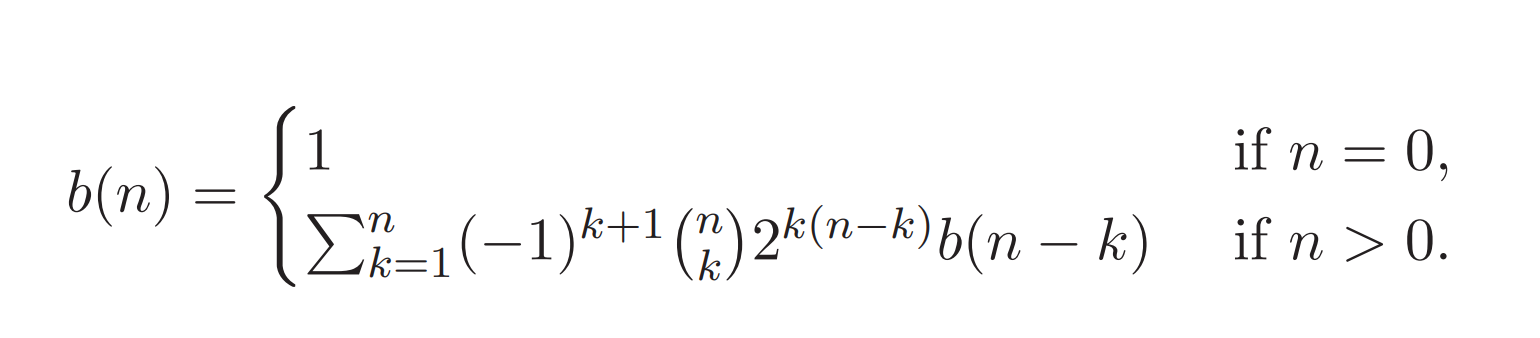

In [19]:
from IPython import display
display.Image("Unknown-2.png", width="1000", height="1000")

#### Zaimplementuj ten wzór oraz sprawdź go dla 3 cech (przyklad wyżej). Ile możliwych sieci występuje dla 10 cech?

In [73]:
from scipy.special import binom

def LiczbaTopologii(n):
    if n == 0:
        b = 1
    else:
        b = 0
        for k in range(1,n+1):
            b += (-1)**(k+1)*binom(n,k)*2**(k*(n-k))*LiczbaTopologii(n-k)
    return b

In [74]:
LiczbaTopologii(3) # dla 3 cech

25.0

In [75]:
LiczbaTopologii(10) # dla 10 cech

4.175098976430598e+18